In [1]:
import numpy as np
import math

In [2]:
n= 3
np.random.seed(1)
alpha = 0.5
T= 1000
m = np.random.uniform(0, 3, n)
sig = np.random.uniform(.5,.5,n)
a = np.random.uniform(1,2,n)
b = np.random.uniform(0,.01, n)
c = np.random.uniform(0.0, 3.14*2, n)
def cosMew(k,t):
    return a[k] * np.cos(b[k]*t + c[k])
def bandit(k, t, band):
    if band == "constant":
        return np.random.normal(m[k], sig[k])
    else:
        mew = cosMew(k,t) #a[k]*math.cos(b[k]*t + c[k])
        return np.random.normal(mew, sig[k])
print(bandit(1, 200, "constant"))
print(bandit(1, 200, "cos"))

    

1.7310201769594475
2.2285898214190722


# Random Selection

In [3]:

np.random.seed(0)
total_reward = 0
for t in range(T):
    #random policy
    k = np.random.choice(range(n))
    reward = bandit(k,0,"constant")
    #print(k, reward)
    total_reward += reward
print(total_reward)

1109.7464924196177


In [4]:

np.random.seed(0)
total_reward = 0
for t in range(T):
    #random policy
    k = np.random.choice(range(n))
    reward = bandit(k,t,"cos")
    #print(k, reward)
    total_reward += reward
print(total_reward)

45.39274010218788


# Epsilon-Greedy Policies

In [5]:
# epsilon greedy when it wieghts over entire history for constant average value
def epsilon_greedy(epsilon, band = "constant"):
    graphs = []
    weights = np.zeros(n)
    times = np.zeros(n)
    total_reward = 0
    rewards = np.zeros(T)

    for t in range(T):
        #random policy
        rand = np.random.random()
        if rand < epsilon:
            k = np.random.choice(range(n))
        else:
            k = np.argmax(weights)
        times[k] += 1
        reward = bandit(k, t, band)
        weights[k] += 1/times[k]*(reward-weights[k])
        #print(k, reward)
        total_reward += reward
        rewards[t] = total_reward/(t+1)
        graphs.append(weights.copy())
    return (total_reward, rewards, graphs)

#print(weights/times

In [6]:
# epsilon greedy when uses upper bound selection for its greedy action
# I used the method that remembered all past values for this, 
#   since the greedy action selection also seems to depend on how many times the action was selected
ct = 1
def epsilon_greedy_upper_bound(epsilon, band = "constant"):
    graphs = []
    weights = np.zeros(n) 
    times = np.zeros(n)
    total_reward = 0
    rewards = np.zeros(T)
    
    

    for t in range(T):
        #random policy
        rand = np.random.random()
        if rand < epsilon:
            k = np.random.choice(range(n))
        else:
            k = np.argmax(weights + ct*np.sqrt(np.log(t)/times))
        times[k] += 1
        reward = bandit(k, t, band)
        weights[k] += 1/times[k]*(reward-weights[k])
        #print(k, reward)
        total_reward += reward
        rewards[t] = total_reward/(t+1)
        graphs.append(weights.copy())
    return (total_reward, rewards, graphs)
(p4, p4r, graphs) = epsilon_greedy_upper_bound(.1)
print(p4)
#print(weights/times

2035.6342928555646


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide


In [7]:
# original version used in class when it remembers all past instances and averages them equally as well
def epsilon_greedy_alpha(epsilon, band = "constant"):
    graphs = []
    weights = np.zeros(n) 
    times = np.zeros(n)
    total_reward = 0
    rewards = np.zeros(T)
    
    

    for t in range(T):
        #random policy
        rand = np.random.random()
        if rand < epsilon:
            k = np.random.choice(range(n))
        else:
            k = np.argmax(weights)
        times[k] += 1
        reward = bandit(k,t, band)
        weights[k] += alpha*(reward-weights[k])
        #print(k, reward)
        total_reward += reward
        rewards[t] = total_reward/(t+1)
        graphs.append(weights.copy())
    return (total_reward, rewards, graphs)

#print(weights/times

# Comparing each method against a constant mew for each action

In [8]:

randseed = 3
np.random.seed(randseed)
(p1, p1r, graph1) = epsilon_greedy(0.1)
np.random.seed(randseed)
(p2, p2r, graph2) = epsilon_greedy_alpha(0.1)
np.random.seed(randseed)
(p3, p3r, graph3) = epsilon_greedy_upper_bound(.1)

print(p1)
print(p2)
print(p3)

1960.2913318451722
1953.9219795816407
2022.7341315908288


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide


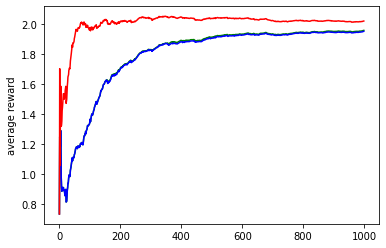

In [9]:
import matplotlib.pyplot as plt
colors = ["green", "blue", "red"]
plt.plot(p1r, color=colors[0])# recent memory
plt.plot(p2r, color=colors[1]) # full memory
plt.plot(p3r, color=colors[2])  # upper bound
plt.ylabel('average reward')
plt.show()


(3, 1000)


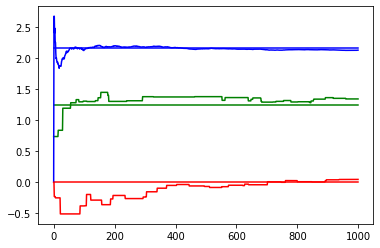

In [10]:
#shows the choices the algorithm made in the graph relative to the actual values of the actions.
for x in range(n):
    pl = np.zeros(T)
    for y in range(T):
        pl[y] = m[x]
    plt.plot(pl, colors[x])

graarr = np.array(graph3).T
print(np.shape(graarr))
count = 0
for x in graarr:
    plt.plot(x, colors[count])
    count +=1 
plt.show()

# Comparing each method against a nonstationary mew for each action

In [11]:

randseed = 2
np.random.seed(randseed)
(p1, p1r, graph1) = epsilon_greedy(0.1, "cos")
np.random.seed(randseed)
(p2, p2r, graph2) = epsilon_greedy_alpha(0.1, "cos")
np.random.seed(randseed)
(p3, p3r, graph3) = epsilon_greedy_upper_bound(.1, "cos")

print(p1)
print(p2)
print(p3)

648.0261182545543
778.6735296888311
741.9691732348285


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide


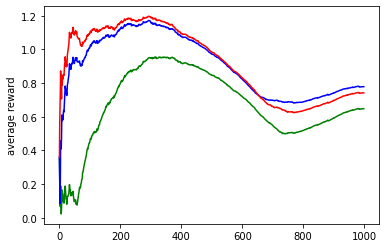

In [12]:

plt.plot(p1r, color="green")# recent memory
plt.plot(p2r, color="blue") # full memory
plt.plot(p3r, color="red")  # upper bound
plt.ylabel('average reward')
plt.show()


(3, 1000)


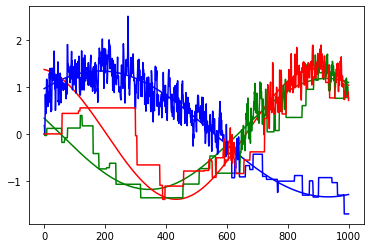

In [13]:

#shows the choices the algorithm made in the graph relative to the actual values of the actions.
for x in range(n):
    pl = np.zeros(T)
    for y in range(T):
        pl[y] = cosMew(x, y)
    plt.plot(pl, colors[x])

graarr = np.array(graph2).T
print(np.shape(graarr))
count = 0
for x in graarr:
    plt.plot(x, colors[count])
    count +=1 
plt.show()

(3, 1000)


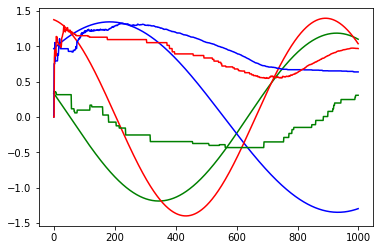

In [14]:

#shows the choices the algorithm made in the graph relative to the actual values of the actions.
for x in range(n):
    pl = np.zeros(T)
    for y in range(T):
        pl[y] = cosMew(x, y)
    plt.plot(pl, colors[x])

graarr = np.array(graph3).T
print(np.shape(graarr))
count = 0
for x in graarr:
    plt.plot(x, colors[count])
    count +=1 
plt.show()